In [27]:
from hw2 import Uniform,Exponential,Xnorgenerator
from scipy.stats import chisquare,kstest
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("ggplot")

In [28]:
BINS = 100
uniform = Uniform()
uni = uniform.rvs(50000)

<Axes: ylabel='Count'>

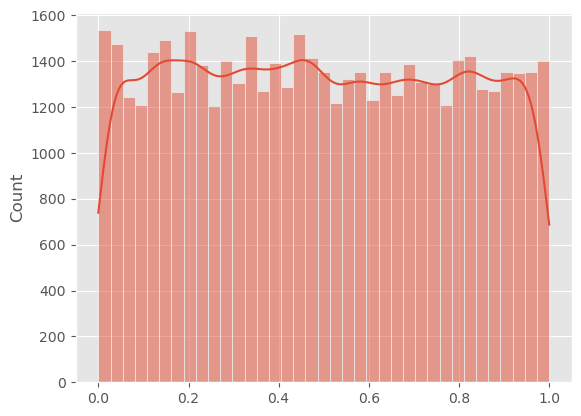

In [29]:
sns.histplot(uni,kde=True)

Power_divergenceResult(statistic=0.011976559999999999, pvalue=1.0)

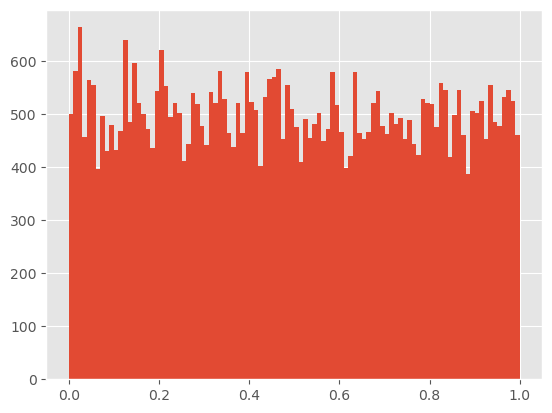

In [30]:
counts = plt.hist(uni,bins=BINS)[0]
total_freq = np.sum(counts)
obs_freq = counts/total_freq
obs_freq
exp_freq = 1 / BINS * np.ones(obs_freq.shape)
chisquare(obs_freq,exp_freq)

In [31]:
x = stats.uniform(loc = 0, scale = 1).rvs(size=50000)
kstest(x,stats.uniform.cdf)

cdf = stats.uniform.cdf(x=np.linspace(0,1,num=500))

In [32]:
from hw2 import ks_distance

diffs = []
uniform = Uniform()
for i in range(500):
    diffs.append(ks_distance(uniform.rvs(500), cdf))

<Axes: ylabel='Count'>

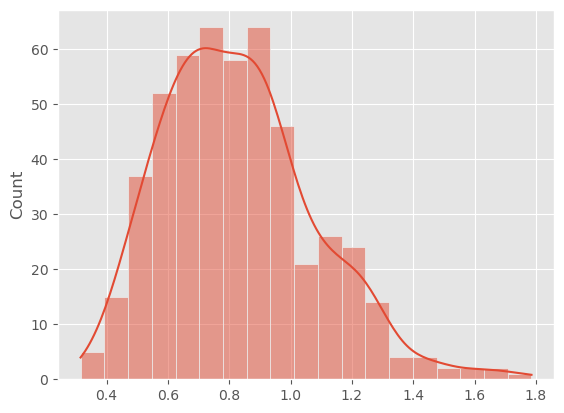

In [33]:
sns.histplot(diffs,kde=True)

In [35]:
exp = Exponential()
ys = exp.rvs(10000)

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'